# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">استفاده از مدل‌های از قبل آموزش داده شده‌ی فریم ورک Caffe</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد نیاز</div>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود تصویر و نمایش آن</div>

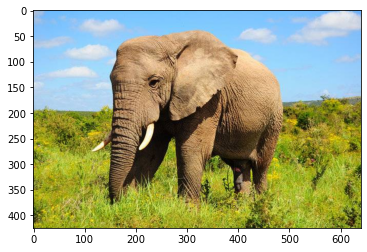

In [2]:
image = cv2.imread("images/elephant.jpg")
plt.imshow(image[...,::-1]);

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود لیبلها</div>

In [3]:
rows = open("model/caffe/synset_words.txt").read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]
classes

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ساخت یک blob از روی تصویر</div>

In [4]:
blob = cv2.dnn.blobFromImage(image, 1, (224, 224), (104, 117, 123))
blob.shape

(1, 3, 224, 224)

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ساخت شبکه با لود مدل و وزنها</div>

In [5]:
net = cv2.dnn.readNetFromCaffe("model/caffe/bvlc_googlenet.prototxt", "model/caffe/bvlc_googlenet.caffemodel")

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">معرفی ورودی به شبکه</div>

In [6]:
net.setInput(blob)

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">دریافت خروجی مدل</div>

In [7]:
preds = net.forward()
preds.shape

(1, 1000)

In [13]:
np.argmax(preds)

386

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش کلاس برنده</div>

In [14]:
idx = np.argmax(preds)
classes[idx]

'African elephant'

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">و یا نمایش n کلاس با بیشترین احتمال</div>

In [15]:
idxs = np.argsort(preds[0])[::-1][:3]
for idx in idxs:
    print(classes[idx])

African elephant
tusker
Indian elephant


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش n کلاس با بیشترین احتمال با نمایش مقدار احتمالات</div>

In [16]:
idxs = np.argsort(preds[0])[::-1][:3]
for idx in idxs:
    print("{}:{:.2f}%".format(classes[idx], preds[0][idx]*100))

African elephant:82.85%
tusker:13.52%
Indian elephant:3.63%


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد کامال از ابتدا تا انتها</div>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Load Labels
rows = open("model/caffe/synset_words.txt").read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

#Load network
net = cv2.dnn.readNetFromCaffe("model/caffe/bvlc_googlenet.prototxt", "model/caffe/bvlc_googlenet.caffemodel")

def predict(img):
    blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))
    net.setInput(blob)
    preds = net.forward()
    idx = np.argmax(preds)
    return classes[idx], round(preds[0][idx]*100, 2)

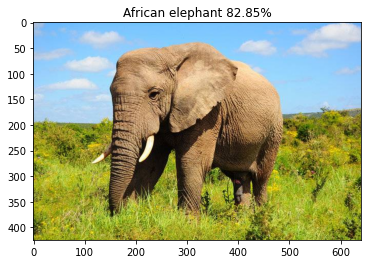

In [2]:
image = cv2.imread("images/elephant.jpg")
label, condidence = predict(image)
plt.imshow(image[...,::-1])
plt.title("{} {}%".format(label, condidence));

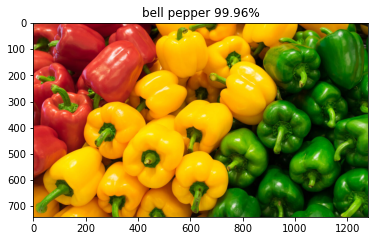

In [3]:
image = cv2.imread("images/felfel-dolme.jpg")
label, condidence = predict(image)
plt.imshow(image[...,::-1])
plt.title("{} {}%".format(label, condidence));

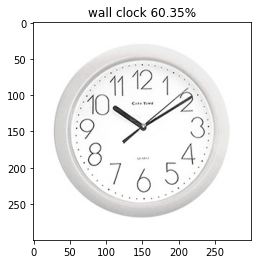

In [4]:
image = cv2.imread("images/clock.jpg")
label, condidence = predict(image)
plt.imshow(image[...,::-1])
plt.title("{} {}%".format(label, condidence));